In [31]:
# draw results

In [12]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(font_scale=1.3)

In [13]:
rolling_frame = 100
steps = 2000
frame_size = 1
env_path = ''
logs_path = env_path + 'results/'
figure_path = env_path + 'figures/'
# logs_path = env_path + 'results/' + sub_name
file_names = ['Results_Sim4_1_1_updated_base.csv', 'Results_Sim5_1_1_updated_base.csv', 'Results_Sim6_1_1_updated_base.csv']
labels = ['Share-all', 'Share-rules', 'Exanna']
# colors = np.array(['tab:green', 'tab:red', 'tab:blue', 'yellow'])
colors = ['tab:green', 'tab:red', 'tab:blue', 'purple', 'orange', 'maroon', 'cyan', 'brown', 'pink', 'gray', 'aqua', 'lightcoral', 'olive', 'coral', 'tab:blue', 'blue']

In [14]:
dataframes = []
for idx in range(len(file_names)):
    dataframe = pd.read_csv(logs_path + file_names[idx])
    dataframes.append(dataframe)

<ipython-input-187-af5c59210099>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


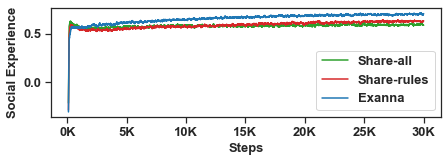

In [187]:
attribute = 'Payoff_Per_Interaction'
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
ax.set_xlabel('Steps', fontsize=13, fontweight='bold')
ax.set_ylabel('Social Experience', fontsize=13, fontweight='bold')

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.rcParams["figure.figsize"] = (7,2)
plt.rc('font', weight='bold')
plt.rc('legend', fontsize=13)

for idx in range(len(file_names)):    
    dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
    dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

ax.legend()
current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Social_Experience.pdf", format="pdf", bbox_inches="tight")
plt.show()


<ipython-input-224-04cee77f1c66>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


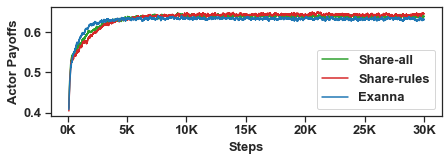

In [224]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Actor_Payoff_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Actor Payoffs')

ax.set_xlabel('Steps', fontsize=13, fontweight='bold')
ax.set_ylabel('Actor Payoffs', fontsize=13, fontweight='bold')

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.rcParams["figure.figsize"] = (7,2)
plt.rc('font', weight='bold')
plt.rc('legend', fontsize=13)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Actor_Payoffs_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-225-12bebcc5e3f9>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


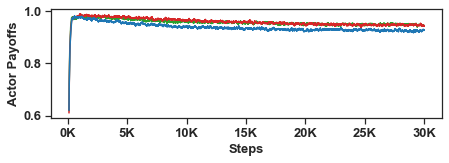

In [225]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Actor_Payoff_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Actor Payoffs')

ax.set_xlabel('Steps', fontsize=13, fontweight='bold')
ax.set_ylabel('Actor Payoffs', fontsize=13, fontweight='bold')

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.rcParams["figure.figsize"] = (7,2)
plt.rc('font', weight='bold')
plt.rc('legend', fontsize=13)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#         dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

# ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Actor_Payoffs_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-199-434d20f32535>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


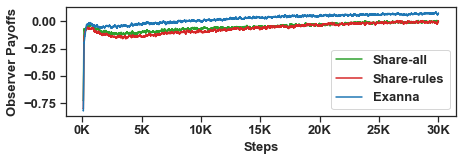

In [199]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Observer_Payoff_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Observer Payoffs')

ax.set_xlabel('Steps', fontsize=13, fontweight='bold')
ax.set_ylabel('Observer Payoffs', fontsize=13, fontweight='bold')

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.rcParams["figure.figsize"] = (7,2)
plt.rc('font', weight='bold')
plt.rc('legend', fontsize=13)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Observer_Payoffs_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-200-4b588af364d6>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


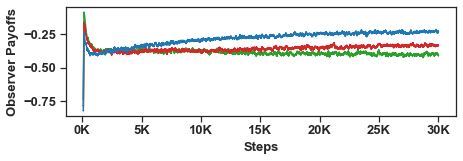

In [200]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Observer_Payoff_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Observer Payoffs')

ax.set_xlabel('Steps', fontsize=13, fontweight='bold')
ax.set_ylabel('Observer Payoffs', fontsize=13, fontweight='bold')

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.rcParams["figure.figsize"] = (7,2)
plt.rc('font', weight='bold')
plt.rc('legend', fontsize=13)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

# ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Observer_Payoffs_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

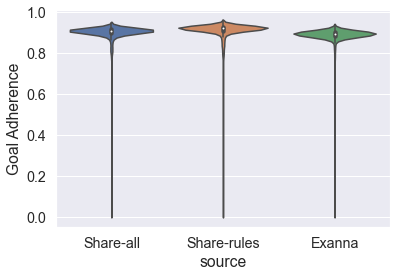

In [40]:
# attribute = 'Satisfaction_Per_Interaction'

# fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

# dataframe = pd.DataFrame()
# for idx in range(len(file_names)):
#     arr = [labels[idx] for i in range(len(dataframes[idx]))]
#     dataframes[idx]['source'] = arr
#     dataframe = pd.concat([dataframe, dataframes[idx]])

# sns_plot = sns.violinplot(x=dataframe.source, y=dataframe[attribute], data=dataframe, cut = 0)
# sns_plot.set_ylabel("Goal Adherence")
# # sns_plot = sns.boxplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
# # sns_plot = sns.swarmplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
# fig = sns_plot.get_figure()
# fig.savefig(figure_path + "Adherence_Per_Interaction_violinplot.pdf", bbox_inches='tight')

<ipython-input-201-edc2c3676c1a>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


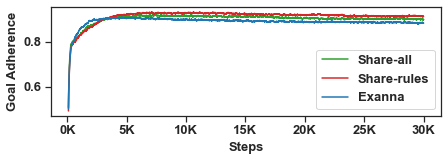

In [201]:
attribute = 'Satisfaction_Per_Interaction'
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=13, fontweight='bold')
ax.set_ylabel('Goal Adherence', fontsize=13, fontweight='bold')

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.rcParams["figure.figsize"] = (7,2)
plt.rc('font', weight='bold')
plt.rc('legend', fontsize=13)
   
for idx in range(len(file_names)):
#     agent_payoff_label = agent_payoff_labels[agentId]
#     df[agent_payoff_label].plot(color=colors[agentId])
    dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
    dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Adherence_Per_Interaction.pdf", format="pdf", bbox_inches="tight")
plt.show()


<ipython-input-202-bf8b5a5e8ae4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


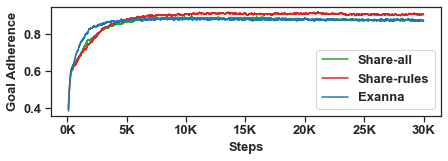

In [202]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Satisfaction_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=13, fontweight='bold')
ax.set_ylabel('Goal Adherence', fontsize=13, fontweight='bold')

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.rcParams["figure.figsize"] = (7,2)
plt.rc('font', weight='bold')
plt.rc('legend', fontsize=13)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Agent_Goal_Adherence_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-203-1023e1039e5b>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


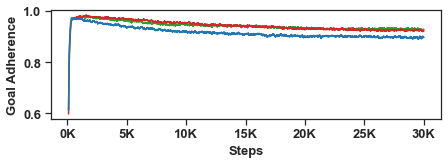

In [203]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Satisfaction_for_{}_agents".format(x) for x in agent_types])
sns.set_theme(style="ticks")

fig, ax = plt.subplots()
# ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

ax.set_xlabel('Steps', fontsize=13, fontweight='bold')
ax.set_ylabel('Goal Adherence', fontsize=13, fontweight='bold')

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.rcParams["figure.figsize"] = (7,2)
plt.rc('font', weight='bold')
plt.rc('legend', fontsize=13)

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

# ax.legend()

current_labels = plt.gca().get_xticks()
current_labels = [int(x)/1000 for x in current_labels]
xlabels = ['{:,.0f}'.format(x) + 'K' for x in current_labels]
plt.gca().set_xticklabels(xlabels)

plt.savefig(figure_path + "Agent_Goal_Adherence_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

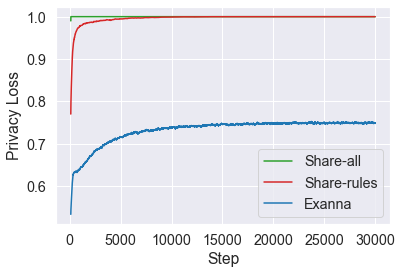

In [44]:
# # attribute = 'Avg_information_cost'
# attribute = 'Avg_privacy_loss'
# # for idx, file_name in enumerate(file_names):
# #     dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
# #     dataframes[idx][attribute].plot(color=colors[idx])

# fig, ax = plt.subplots()
# ax.set(xlabel = 'Step', ylabel = 'Privacy Loss')
   
# for idx in range(len(file_names)):
# #     agent_payoff_label = agent_payoff_labels[agentId]
# #     df[agent_payoff_label].plot(color=colors[agentId])
#     dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
#     dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

# ax.legend()
# # plt.savefig(figure_path + "Step_Privacy_Loss.pdf", format="pdf", bbox_inches="tight")
# plt.show()


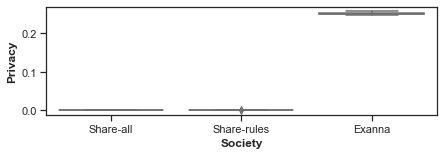

In [15]:
attribute = 'Avg_privacy_loss'
sns.set_theme(style="ticks", palette="pastel")
dataframe = pd.read_csv(logs_path + 'Summary.csv')

plt.rcParams["figure.figsize"] = (7,2)

sns_plot = sns.boxplot(data=dataframe, x=dataframe.source, y=1-dataframe[attribute])
sns_plot.set(xlabel='Society', ylabel = 'Privacy')
sns_plot.set_xlabel(sns_plot.get_xlabel(), fontdict={'weight': 'bold'})
sns_plot.set_ylabel(sns_plot.get_ylabel(), fontdict={'weight': 'bold'})
fig = sns_plot.get_figure()
fig.savefig(figure_path + "Privacy.pdf", bbox_inches='tight')

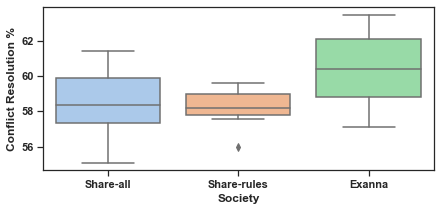

In [241]:
attribute = 'resolution'
sns.set_theme(style="ticks", palette="pastel")
dataframe = pd.read_csv(logs_path + 'Summary.csv')

plt.rcParams["figure.figsize"] = (7,3)

sns_plot = sns.boxplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
sns_plot.set(xlabel='Society', ylabel = 'Conflict Resolution %')
sns_plot.set_xlabel(sns_plot.get_xlabel(), fontdict={'weight': 'bold'})
sns_plot.set_ylabel(sns_plot.get_ylabel(), fontdict={'weight': 'bold'})
fig = sns_plot.get_figure()
fig.savefig(figure_path + "Conflict_resolution.pdf", bbox_inches='tight')
